# +++ Deliverable 1: Data Collection & Preprocessing +++

# -> Cleaning 
# Dataset 1

In [3]:
import pandas as pd
import openpyxl

first_heart_csv = "/Users/leomath27/Desktop/PROJECTS/Heart disease ai/heart.csv"
df = pd.read_csv(first_heart_csv)

first_excel_format = "/Users/leomath27/Desktop/PROJECTS/Heart disease ai/heart.xlsx"
df.to_excel(first_excel_format , index= False, engine= "openpyxl")
df_excel = pd.read_excel(first_excel_format)

print(df_excel)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [24]:
import pandas as pd
import openpyxl

first_heart_csv = "/Users/leomath27/Desktop/PROJECTS/Heart disease ai/heart.csv"
df = pd.read_csv(first_heart_csv)
df = df.drop_duplicates().drop(columns = "ca").drop(columns = "thal")

print(df)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  target  
0        0       1  
1        0       1  
2        2       1  
3  

In [26]:
df.describe().round(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000,302.000
mean,54.421,0.682,0.964,131.603,246.500,0.149,0.526,149.570,0.328,1.043,1.397,0.543
std,9.048,0.466,1.032,17.563,51.753,0.357,0.526,22.904,0.470,1.161,0.616,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000
25%,48.000,0.000,0.000,120.000,211.000,0.000,0.000,133.250,0.000,0.000,1.000,0.000
50%,55.500,1.000,1.000,130.000,240.500,0.000,1.000,152.500,0.000,0.800,1.000,1.000
75%,61.000,1.000,2.000,140.000,274.750,0.000,1.000,166.000,1.000,1.600,2.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,1.000


# Dataset 2

In [5]:
import pandas as pd
import openpyxl

second_heart_csv = "/Users/leomath27/Desktop/PROJECTS/Heart disease ai/heart 2.csv"
df2= pd.read_csv(second_heart_csv)

second_excel_format = "/Users/leomath27/Desktop/PROJECTS/Heart disease ai/heart 2.xlsx"
df2.to_excel(second_excel_format , index= False, engine= "openpyxl")
df2_excel = pd.read_excel(second_excel_format)

print(df2_excel)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [25]:
import pandas as pd
import openpyxl

second_heart_csv = "/Users/leomath27/Desktop/PROJECTS/Heart disease ai/heart 2.csv"
df2= pd.read_csv(second_heart_csv)
df2 = df2.drop_duplicates().drop(columns = "ca").drop(columns = "thal")


print(df2)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  target  
0        2       0  
1        0       0  
2        0       0  
3  

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  target    302 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 30.7 KB


# ->Performed EDA 
# Renamed some columns, Formatted Outlier values, Changed numerical values into categorical, Constructed graph for visualisation

# Dataset 1

(302, 12)
The lower and upper bound are 
 restbps      90.000
cholest     115.375
restecg      -1.500
mxhrtrte     84.125
oldpeak      -2.400
slope        -0.500
target       -1.500
dtype: float64 restbps     170.000
cholest     370.375
restecg       2.500
mxhrtrte    215.125
oldpeak       4.000
slope         3.500
target        2.500
dtype: float64


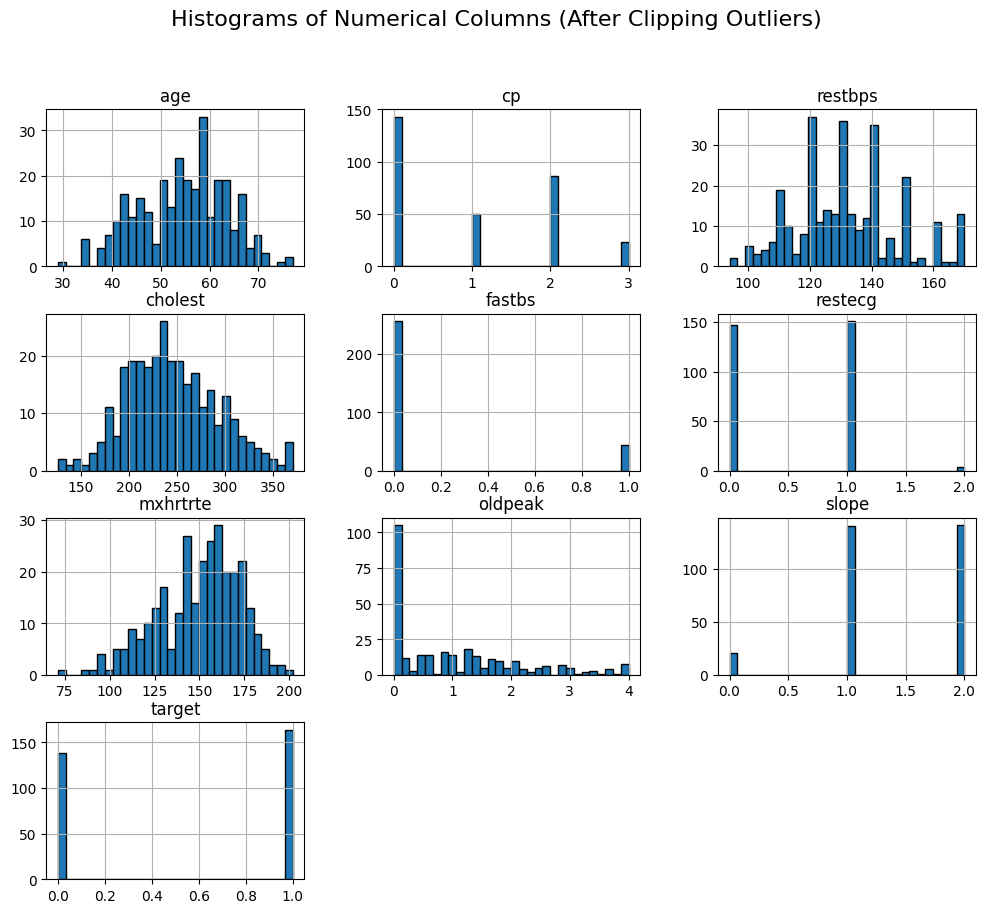

     age     sex  cp  restbps  cholest  fastbs  restecg  mxhrtrte exang  \
0     63    Male   3      145    233.0       1        0       150     N   
1     37    Male   2      130    250.0       0        1       187     N   
2     41  Female   1      130    204.0       0        0       172     N   
3     56    Male   1      120    236.0       0        1       178     N   
4     57  Female   0      120    354.0       0        1       163     Y   
..   ...     ...  ..      ...      ...     ...      ...       ...   ...   
297   57  Female   0      140    241.0       0        1       123     Y   
298   45    Male   3      110    264.0       0        1       132     N   
299   68    Male   0      144    193.0       1        1       141     N   
300   57    Male   0      130    131.0       0        1       115     Y   
301   57  Female   1      130    236.0       0        0       174     N   

     oldpeak  slope  target  
0        2.3      0       1  
1        3.5      0       1  
2        

In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt


df=pd.read_excel("heart.xlsx")
#print(df.to_string())
print(df.shape)  # (rows, columns)
df.rename(columns={'trestbps': 'restbps','chol':'cholest','fbs':'fastbs','thalach':'mxhrtrte'}, inplace=True)
df['sex'] = df['sex'].replace({1: 'Male', 0: 'Female'})
df['exang'] = df['exang'].replace({1: 'Y', 0: 'N'})




numcolumns=df.select_dtypes(include=['int64','float64'])
Q1 = df[[ 'restbps', 'cholest',  'restecg', 'mxhrtrte', 'oldpeak', 'slope', 'target']].quantile(0.25)
Q3 = df[[ 'restbps', 'cholest',  'restecg', 'mxhrtrte', 'oldpeak', 'slope', 'target']].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for each column based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("The lower and upper bound are \n",lower_bound,upper_bound)
df_clipped = df.copy()  # Keep all columns

# Ensure clipping is applied only to the columns with calculated bounds
columns_to_clip = ['restbps', 'cholest', 'restecg', 'mxhrtrte', 'oldpeak', 'slope', 'target']

df_clipped[columns_to_clip] = df[columns_to_clip].clip(lower=0, upper=upper_bound, axis=1)

df_clipped.hist(figsize=(12, 10), bins=30, edgecolor='black')

plt.suptitle("Histograms of Numerical Columns (After Clipping Outliers)", fontsize=16)
plt.show()

print(df_clipped)
df_clipped.to_excel("Heart_disease-eda1.xlsx", index=False)  # Saves without the index column

# Dataset 2

(1025, 14)
The lower and upper bound are 
 restbps      90.000
cholest     115.375
restecg      -1.500
mxhrtrte     84.125
oldpeak      -2.400
slope        -0.500
target       -1.500
dtype: float64 restbps     170.000
cholest     370.375
restecg       2.500
mxhrtrte    215.125
oldpeak       4.000
slope         3.500
target        2.500
dtype: float64


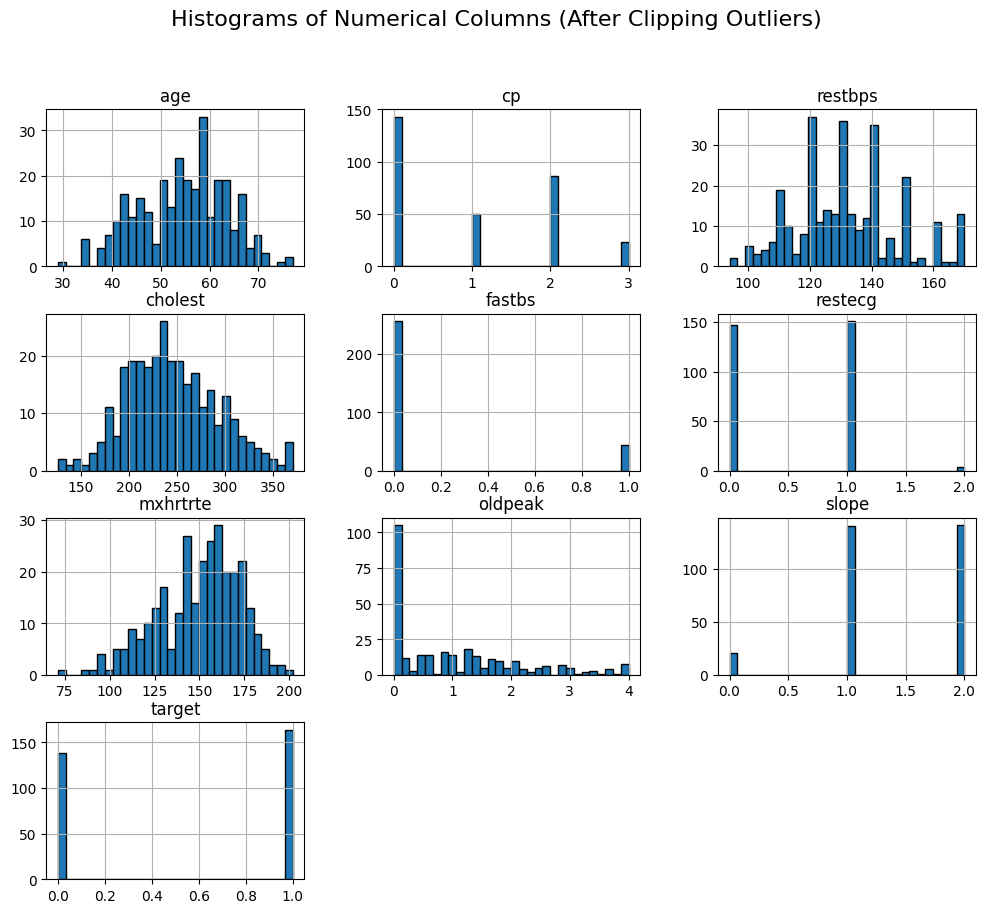

     age     sex  cp  restbps  cholest  fastbs  restecg  mxhrtrte exang  \
0     52    Male   0      125    212.0       0        1       168     N   
1     53    Male   0      140    203.0       1        0       155     Y   
2     70    Male   0      145    174.0       0        1       125     Y   
3     61    Male   0      148    203.0       0        1       161     N   
4     62  Female   0      138    294.0       1        1       106     N   
..   ...     ...  ..      ...      ...     ...      ...       ...   ...   
723   68  Female   2      120    211.0       0        0       115     N   
733   44  Female   2      108    141.0       0        1       175     N   
739   52    Male   0      128    255.0       0        1       161     Y   
843   59    Male   3      160    273.0       0        0       125     N   
878   54    Male   0      120    188.0       0        1       113     N   

     oldpeak  slope  target  
0        1.0      2       0  
1        3.1      0       0  
2        

In [3]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt




df2=pd.read_excel("heart 2.xlsx")
#print(df.to_string())
print(df2.shape)  # (rows, columns)
df2.rename(columns={'trestbps': 'restbps','chol':'cholest','fbs':'fastbs','thalach':'mxhrtrte'}, inplace=True)
df2 = df2.drop_duplicates().drop(columns = "ca").drop(columns = "thal")
df2['sex'] = df2['sex'].replace({1: 'Male', 0: 'Female'})
df2['exang'] = df2['exang'].replace({1: 'Y', 0: 'N'})




numcolumns=df2.select_dtypes(include=['int64','float64'])
Q1 = df2[[ 'restbps', 'cholest',  'restecg', 'mxhrtrte', 'oldpeak', 'slope', 'target']].quantile(0.25)
Q3 = df2[[ 'restbps', 'cholest',  'restecg', 'mxhrtrte', 'oldpeak', 'slope', 'target']].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for each column based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("The lower and upper bound are \n",lower_bound,upper_bound)
df2_clipped = df2.copy()  # Keep all columns

# Ensure clipping is applied only to the columns with calculated bounds
columns_to_clip = ['restbps', 'cholest', 'restecg', 'mxhrtrte', 'oldpeak', 'slope', 'target']

df2_clipped[columns_to_clip] = df2[columns_to_clip].clip(lower=0, upper=upper_bound, axis=1)

df2_clipped.hist(figsize=(12, 10), bins=30, edgecolor='black')

plt.suptitle("Histograms of Numerical Columns (After Clipping Outliers)", fontsize=16)
plt.show()

print(df2_clipped)
df2_clipped.to_excel("Heart_disease-eda1.xlsx", index=False)  # Saves without the index column

# -> Normalization

# Dataset 1

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

first_heart_csv = "/Users/leomath27/Desktop/PROJECTS/Heart disease ai/heart.csv"
df = pd.read_csv(first_heart_csv)
X1 = df.iloc[:, :-1]
y1 = df.iloc[:, -1]
scaleMinMax_1 = MinMaxScaler(feature_range=(0, 1))
X = scaleMinMax_1.fit_transform(X1)  # Correct scaler applied here

X1_normalized = pd.DataFrame(X, columns= X1.columns)
X1_normalized['target'] = y1

print(X1_normalized.head())
print(X1_normalized.describe().round(3))
X1_normalized.to_excel("heart_1_normalized.xlsx", index=False)

        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053    0.0   
1  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496    0.0   
2  0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992    0.0   
3  0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794    0.0   
4  0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290    1.0   

    oldpeak  slope   ca      thal  target  
0  0.370968    0.0  0.0  0.333333       1  
1  0.564516    0.0  0.0  0.666667       1  
2  0.225806    1.0  0.0  0.666667       1  
3  0.129032    1.0  0.0  0.666667       1  
4  0.096774    1.0  0.0  0.666667       1  
           age      sex       cp  trestbps     chol      fbs  restecg  \
count  303.000  303.000  303.000   303.000  303.000  303.000  303.000   
mean     0.528    0.683    0.322     0.355    0.275    0.149    0.264   
std      0.189    0.466    0.3

# Dataset 2

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

second_heart_csv = "/Users/leomath27/Desktop/PROJECTS/Heart disease ai/heart 2.csv"
df2 = pd.read_csv(second_heart_csv)
X2 = df2.iloc[:, :-1]  # All columns except the last one
y2 = df2.iloc[:, -1]   # Select the first 12 columns
scaleMinMax_2 = MinMaxScaler(feature_range=(0, 1))
XX = scaleMinMax_2.fit_transform(X2)  # Correct scaler applied here

X2_normalized = pd.DataFrame(XX, columns=X2.columns)
X2_normalized['target'] = y2 
print(X2_normalized.head())
print(X2_normalized.describe().round(3))
X2_normalized.to_excel("heart_2_normalized.xlsx", index=False)

        age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167  1.0  0.0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1  0.500000  1.0  0.0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2  0.854167  1.0  0.0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3  0.666667  1.0  0.0  0.509434  0.175799  0.0      0.5  0.687023    0.0   
4  0.687500  0.0  0.0  0.415094  0.383562  1.0      0.5  0.267176    0.0   

    oldpeak  slope    ca      thal  target  
0  0.161290    1.0  0.50  1.000000       0  
1  0.500000    0.0  0.00  1.000000       0  
2  0.419355    0.0  0.00  1.000000       0  
3  0.000000    1.0  0.25  1.000000       0  
4  0.306452    0.5  0.75  0.666667       0  
            age       sex        cp  trestbps      chol       fbs   restecg  \
count  1025.000  1025.000  1025.000  1025.000  1025.000  1025.000  1025.000   
mean      0.530     0.696     0.314     0.355     0.274     0.149     0.265   
std       0.189     0.460     0.343 

# ++ Deliverable 2: Model Selection & Training ++

In [39]:
import pandas as pd

df1 = pd.read_excel("heart_1_normalized.xlsx")
df2 = pd.read_excel("heart_2_normalized.xlsx")


print("Original df1:")
print(df1.head())
print(df1.describe())

print("Original df2:")
print(df2.head())
print(df2.describe())

print(df1.to_string())

Original df1:
        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333    1  1.000000  0.481132  0.244292    1      0.0  0.603053      0   
1  0.166667    1  0.666667  0.339623  0.283105    0      0.5  0.885496      0   
2  0.250000    0  0.333333  0.339623  0.178082    0      0.0  0.770992      0   
3  0.562500    1  0.333333  0.245283  0.251142    0      0.5  0.816794      0   
4  0.583333    0  0.000000  0.245283  0.520548    0      0.5  0.702290      1   

    oldpeak  slope   ca      thal  target  
0  0.370968    0.0  0.0  0.333333       1  
1  0.564516    0.0  0.0  0.666667       1  
2  0.225806    1.0  0.0  0.666667       1  
3  0.129032    1.0  0.0  0.666667       1  
4  0.096774    1.0  0.0  0.666667       1  
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528465    0.683168    0.322332    0.354941    0.274575    0.14

In [10]:
import pandas as pd
df1 = pd.read_excel("heart_1_normalized.xlsx")
df2 = pd.read_excel("heart_2_normalized.xlsx")
df2 = df1[df2.columns]
combined_df = pd.concat([df1,df2], ignore_index = True)
combined_df.to_excel("combined_normalized_data.xlsx", index = True )



In [ ]:
#import pandas as pd

#df1 = pd.read_excel("heart_1_normalized.xlsx")
#df2 = pd.read_excel("heart_2_normalized.xlsx")

#overlap = pd.merge(df1, df2, how='inner')
#print("Number of Overlapping entries", overlap.shape[0])

#df1_unique = df1[~df1.apply(tuple, 1).isin(overlap.apply(tuple, 1))]
#df2_unique = df2[~df2.apply(tuple, 1).isin(overlap.apply(tuple, 1))]

#combined_df = pd.concat ([df1_unique, df2_unique], ignore_index = False)
#combined_df.to_excel("combined_heart_dataset.xlsx", index=False)
#print(combined_df.head())
#print(combined_df.describe().round(3))



Number of Overlapping entries 1033
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []
       age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
count  0.0  0.0  0.0       0.0   0.0  0.0      0.0      0.0    0.0      0.0   
mean   NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
std    NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
min    NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
25%    NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
50%    NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
75%    NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
max    NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   

       slope   ca  thal  target  
count    0.0  0.0   0.0     0.0  
mean     NaN  NaN   NaN     NaN  
std      NaN  NaN   N

# Random Forest

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import joblib

# Load the dataset
df1 = pd.read_excel("combined_normalized_data.xlsx")
df1 = df1.drop(columns=['Unnamed: 0'])

# Data to be trained and tested
X1 = df1.drop(columns=["target"])
y1 = df1["target"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
print("Number of rows and columns in train and test data ", X_train.shape, X_test.shape)

# Define the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters from the random search
best_params = random_search.best_params_
print(f"Best Parameters Found: {best_params}")

# Update the model with the best parameters
rf_model_updated = RandomForestClassifier(**best_params, random_state=42)

# Retrain the model with the training data
rf_model_updated.fit(X_train, y_train)

# Evaluate the updated model
y_pred_updated = rf_model_updated.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_updated)
precision = precision_score(y_test, y_pred_updated)
f1 = f1_score(y_test, y_pred_updated)
recall = recall_score(y_test, y_pred_updated)

# Get the predicted probabilities for the updated model
y_proba_updated = rf_model_updated.predict_proba(X_test)

# Print the predicted probabilities for the first few samples of the updated model
print("Predicted Probabilities for the first 5 samples (Updated Model):")
print(y_proba_updated[:5])

# Evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")

# Save the updated model if needed
joblib.dump(rf_model_updated, 'random_forest_model_updated.pkl')
print("Updated model saved successfully!")




Number of rows and columns in train and test data  (484, 13) (122, 13)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters Found: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Predicted Probabilities for the first 5 samples (Updated Model):
[[0.96885119 0.03114881]
 [0.95792857 0.04207143]
 [0.12491667 0.87508333]
 [0.00675    0.99325   ]
 [0.35625866 0.64374134]]
Accuracy: 0.9426
Precision: 0.9048
Recall: 0.9828
F1: 0.9421
Updated model saved successfully!


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [14]:
print(set(X_train.index) & set(X_test.index))  # Should be empty

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

<div style="font-size: 30px; font-weight: bold;">
    XGBOOST PERFORMED
</div>



In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
import numpy as np
df = pd.read_excel("combined_normalized_data.xlsx")
df = df.drop(columns=['Unnamed: 0'])
x=df.drop(columns=['target'])
y=df["target"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Number of rows and columns in train and test data ",X_train.shape, X_test.shape)
print(np.bincount(y_train))

model = xgb.XGBClassifier(
    max_depth=5,
    n_estimators=100,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")



# test_input = np.array([[0.479167, 1.0, 0.0, 0.292453, 0.196347, 0.0, 0.5, 0.740458, 0.0, 0.161290, 1.0, 0.5, 1.0]
# ])
# prediction=model.predict(test_input)
# print("Prediction:", prediction)



Number of rows and columns in train and test data  (484, 13) (122, 13)
[212 272]
Accuracy: 0.9836
Precision: 0.9667
Recall: 1.0000
F1: 0.9831


In [27]:
import timeit

rf_time = timeit.timeit(lambda: rf_model.fit(X_train, y_train), number=1)
xgb_time = timeit.timeit(lambda: model.fit(X_train, y_train), number=1)

print(f"Random Forest Training Time: {rf_time:.4f} seconds")
print(f"XGBoost Training Time: {xgb_time:.4f} seconds")


Random Forest Training Time: 0.1976 seconds
XGBoost Training Time: 0.0581 seconds


In [32]:
import joblib

# Save the trained RandomForest model to a file
joblib.dump(rf_model, 'random_forest_mode2.pkl')

print("Model saved successfully!")


Model saved successfully!


In [8]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
